# CS 595A - G5 - Project
Sheridan C. Perry\
Jesus Ferrand

## Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import csv

### MatPlotLib Settings

In [3]:
plt.rc('font',size=14)
plt.rc('axes',labelsize=14,titlesize=14)
plt.rc('legend',fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

## Pre-Processing

### File Conventions

In [4]:
# Location of Files that need to be analyzed using OCR using relative pathing
InputDirectory = 'Test 1 JPEGS' # Manually Change
Number_of_Files = len([name for name in os.listdir(InputDirectory)]) # Find files within location and count length

# Find files in this directory 
FileNames_Directory = os.listdir(InputDirectory)

InputDirectoryFolder = 'Test 1 JPEGS/' # Manually Change
FileNames_Img = [InputDirectoryFolder + s for s in FileNames_Directory]

In [5]:
# Create empty list of CSV Names
CSVNames = []

# Create CSV Directory Folder
CSVDirectory = 'Test 1 JPEGS CSV/' # Manually Change

# Get Stems (names without extensions) of Input File Names
FileStems = []
for name in FileNames_Directory:
    k = name.rfind('.')
    FileStems.append(name[:k])

# Create CSV File Path using Relative Pathing
for i in range(1,Number_of_Files+1):
    CSVNames.append(CSVDirectory+FileStems[i-1] + '_' + str(i) + ".csv")

## Optical Character Recognition

### Load OCR

In [6]:
from paddleocr import PaddleOCR

# Set up ocr with angle corrections using english
ocr = PaddleOCR(use_angle_cls=True, lang="en")  # need to run only once to download and load model into memory

[2024/04/16 13:31:28] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, shape_info_filename=None, precision='fp32', gpu_mem=500, image_dir=None, det_algorithm='DB', det_model_dir='C:\\Users\\Owner/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_box_type='quad', det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, det_fce_box_type='poly', rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\Owner/.paddleocr/whl\\rec\\en\\en_PP-OCRv3_rec_infer', rec_image_shape='3, 48, 320', rec_batch_nu

### Execute OCR

In [7]:
# Loop to write data from OCR into CSV files
for j in range(0,Number_of_Files):
    result = ocr.ocr(FileNames_Img[j])
    with open(CSVNames[j], 'w', newline='') as file:
        writer = csv.writer(file)
        for row in result:
            csv_row= []
            for row0 in row[0]:
                csv_row.append(row0[0])
                csv_row.append(row0[1])
            csv_row.append(row[1][0])
            csv_row.append(row[1][1])
            writer.writerow(csv_row)

[2024/04/16 13:31:36] ppocr DEBUG: dt_boxes num : 30, elapse : 4.168861627578735
[2024/04/16 13:31:36] ppocr DEBUG: cls num  : 30, elapse : 0.22794818878173828
[2024/04/16 13:31:37] ppocr DEBUG: rec_res num  : 30, elapse : 0.19811582565307617
[2024/04/16 13:31:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.04469466209411621
[2024/04/16 13:31:37] ppocr DEBUG: cls num  : 28, elapse : 0.0623011589050293
[2024/04/16 13:31:37] ppocr DEBUG: rec_res num  : 28, elapse : 0.07229757308959961
[2024/04/16 13:31:37] ppocr DEBUG: dt_boxes num : 40, elapse : 0.051001548767089844
[2024/04/16 13:31:37] ppocr DEBUG: cls num  : 40, elapse : 0.11371922492980957
[2024/04/16 13:31:37] ppocr DEBUG: rec_res num  : 40, elapse : 0.12274384498596191
[2024/04/16 13:31:37] ppocr DEBUG: dt_boxes num : 44, elapse : 0.05227851867675781
[2024/04/16 13:31:37] ppocr DEBUG: cls num  : 44, elapse : 0.13590002059936523
[2024/04/16 13:31:37] ppocr DEBUG: rec_res num  : 44, elapse : 0.11024594306945801
[2024/04/16 13:31:37] 

### Load Results and Visualize

In [8]:
from paddleocr import draw_ocr
from PIL import Image

# Defined a function to concatenate the bounding box coordinates back into pairs for draw_ocr
def combine_columns(row):
    return [[row[0], row[1]], [row[2],row[3]], [row[4],row[5]], [row[6],row[7]]]

# Ourput File Directory
OutputDirectory = 'Test 1 Output/'

# Empty list for Final Output Names
FinalNames = []

# Saves draw_ocr outputs in png format
for i in range(1,Number_of_Files+1):
    FinalNames.append(OutputDirectory + FileStems[i-1] + "_" + str(i) + ".png")

# Pulls corresponding information into draw_ocr, displays resulting image, and saves to output directory
for j in range(0,Number_of_Files):  
    TestCSV = pd.read_csv(CSVNames[j], sep=',',header=None)
    TestCSV['combined'] = TestCSV.apply(combine_columns,axis=1)
    image = Image.open(FileNames_Img[j]).convert('RGB')
    boxes = TestCSV['combined']
    txts = TestCSV[8]
    scores = TestCSV[9]
    im_show = draw_ocr(image, boxes, txts, scores,font_path='Font\simfang.ttf') # Manually Change font if desired
    im_show = Image.fromarray(im_show)
    im_show.save(FinalNames[j])

## Natural Language Processing

# Results

## OCR Accuracy

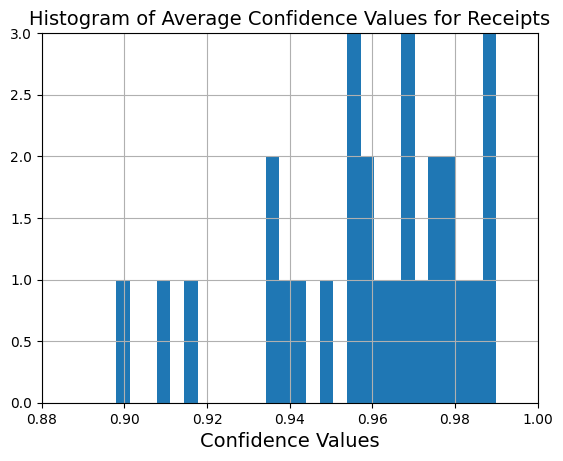

In [10]:
Avg_Confidence = []

for i in range(0,Number_of_Files):
    File = pd.read_csv(CSVNames[i],sep=',',header=None)
    Confidence = File.iloc[:,-1]
    Average = Confidence.mean()
    Avg_Confidence.append(Average)

Conf_Dataframe = pd.DataFrame(Avg_Confidence).round(3)

BinEdges = np.histogram_bin_edges(Conf_Dataframe,len(Conf_Dataframe))

Conf_Dataframe.hist(bins=BinEdges)
plt.title('Histogram of Average Confidence Values for Receipts')
plt.xlabel('Confidence Values')
plt.axis([0.88, 1.0, 0, 3.0])
plt.show()

## Compare Statement and Receipt Totals